In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


In [12]:
# Load dataset dari sumber alternatif
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)


In [13]:
# Menampilkan informasi dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


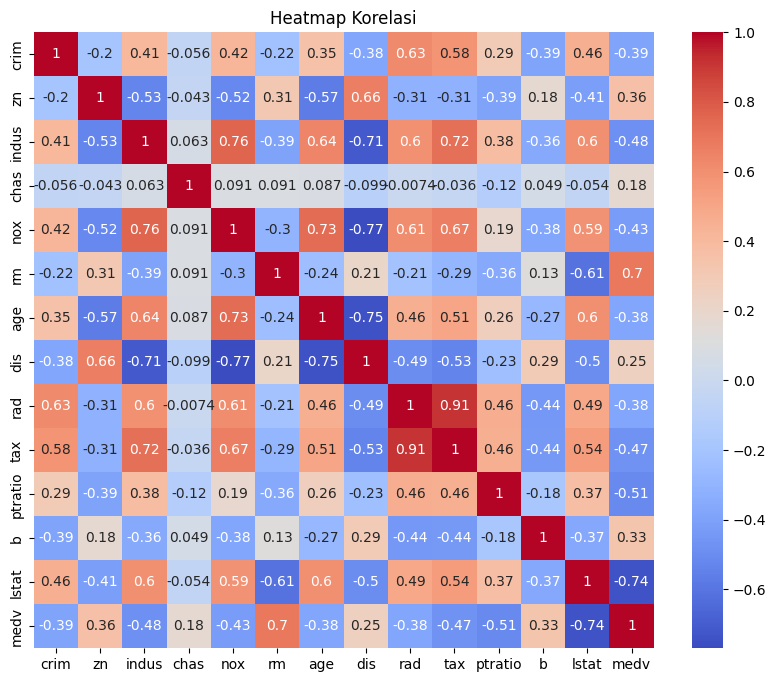

In [14]:
# Menampilkan korelasi
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()


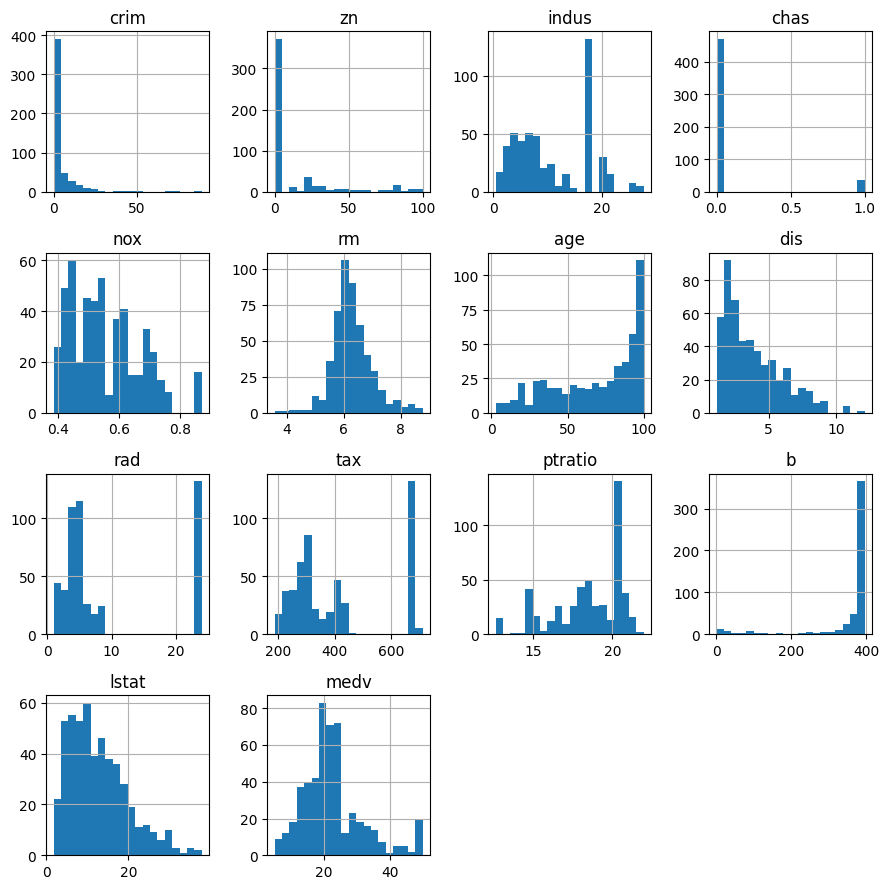

In [15]:
# Menampilkan distribusi fitur
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()


In [16]:
# Menentukan fitur dan target
X = df.drop(columns=['medv'])  # 'medv' adalah harga rumah
y = df['medv']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 24.29111947497374


In [18]:
# Fungsi untuk menghitung korelasi Pearson dengan penjelasan langkah-langkah
def pearson_correlation(x, y):
    x_mean = np.mean(x)  # Menghitung rata-rata x
    y_mean = np.mean(y)  # Menghitung rata-rata y
    
    numerator = np.sum((x - x_mean) * (y - y_mean))  # Pembilang: jumlah dari hasil kali deviasi x dan y terhadap rata-rata
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))  # Penyebut: hasil akar dari jumlah kuadrat deviasi x dan y
    
    r = numerator / denominator  # Koefisien korelasi Pearson
    
    print("\nPenjelasan Persamaan Korelasi Pearson:")
    print(f"Rata-rata x: {x_mean}")
    print(f"Rata-rata y: {y_mean}")
    print(f"Pembilang (Σ(xi - x̄)(yi - ȳ)): {numerator}")
    print(f"Penyebut (√Σ(xi - x̄)² Σ(yi - ȳ)²): {denominator}")
    print(f"Koefisien Korelasi Pearson (r): {r}")
    
    return r

# Contoh penggunaan dengan kolom 'rm' dan 'medv'
r = pearson_correlation(df['rm'], df['medv'])
print(f"\nKoefisien Korelasi Pearson antara RM dan MEDV: {r}")

# Fungsi untuk menghitung Mean Squared Error (MSE) dengan penjelasan
def mean_squared_error_with_explanation(y_true, y_pred):
    errors = (y_true - y_pred) ** 2  # Menghitung error kuadrat
    mse_value = np.mean(errors)  # Menghitung rata-rata error kuadrat
    
    print("\nPenjelasan Persamaan Mean Squared Error:")
    print(f"Error kuadrat: {errors[:5]} ... (menampilkan 5 pertama)")
    print(f"Mean Squared Error (MSE): {mse_value}")
    
    return mse_value

# Menghitung dan menjelaskan MSE
mse_explained = mean_squared_error_with_explanation(y_test, y_pred)



Penjelasan Persamaan Korelasi Pearson:
Rata-rata x: 6.284634387351779
Rata-rata y: 22.532806324110677
Pembilang (Σ(xi - x̄)(yi - ȳ)): 2269.1901691699604
Penyebut (√Σ(xi - x̄)² Σ(yi - ȳ)²): 3263.3317157919423
Koefisien Korelasi Pearson (r): 0.6953599470715393

Koefisien Korelasi Pearson antara RM dan MEDV: 0.6953599470715393

Penjelasan Persamaan Mean Squared Error:


C:\Users\Infinix X2\AppData\Local\Temp\ipykernel_8900\323921806.py:30: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(f"Error kuadrat: {errors[:5]} ... (menampilkan 5 pertama)")


Error kuadrat: 173    29.124626
274    13.144724
491     1.480953
72      4.981731
452     7.128259
Name: medv, dtype: float64 ... (menampilkan 5 pertama)
Mean Squared Error (MSE): 24.29111947497374


In [21]:
# Penjelasan Persamaan Matematika
print("\n1. Mean Squared Error (MSE)")
print("Digunakan untuk mengukur seberapa baik model regresi memprediksi nilai.")
print("Rumus:")
print("MSE = (1/n) * Σ(y_true - y_pred)^2")
print("Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.")

print("\n2. Normalisasi dan Standardisasi")
print("MinMax Scaling: X_scaled = (X - X_min) / (X_max - X_min)")
print("Mengubah nilai data ke dalam rentang [0,1] atau [-1,1].")
print("Standard Scaling: X_scaled = (X - mean) / std")
print("Memiliki mean = 0 dan standar deviasi = 1, cocok untuk algoritma yang sensitif terhadap skala.")
print("Robust Scaling: X_scaled = (X - median) / IQR")
print("Menggunakan median dan interquartile range (IQR) untuk mengurangi dampak outlier.")

print("\n3. Discretization")
print("Mengubah variabel kontinu menjadi kategori tertentu.")
print("Contohnya, usia seseorang bisa dikonversi menjadi kelompok usia (misalnya: 'anak', 'remaja', 'dewasa', 'lansia').")
print("Teknik umum yang digunakan:")
print("- Equal-width binning: Rentang nilai dibagi menjadi beberapa bagian dengan lebar yang sama.")
print("- Equal-frequency binning: Setiap kategori memiliki jumlah sampel yang kurang lebih sama.")



1. Mean Squared Error (MSE)
Digunakan untuk mengukur seberapa baik model regresi memprediksi nilai.
Rumus:
MSE = (1/n) * Σ(y_true - y_pred)^2
Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

2. Normalisasi dan Standardisasi
MinMax Scaling: X_scaled = (X - X_min) / (X_max - X_min)
Mengubah nilai data ke dalam rentang [0,1] atau [-1,1].
Standard Scaling: X_scaled = (X - mean) / std
Memiliki mean = 0 dan standar deviasi = 1, cocok untuk algoritma yang sensitif terhadap skala.
Robust Scaling: X_scaled = (X - median) / IQR
Menggunakan median dan interquartile range (IQR) untuk mengurangi dampak outlier.

3. Discretization
Mengubah variabel kontinu menjadi kategori tertentu.
Contohnya, usia seseorang bisa dikonversi menjadi kelompok usia (misalnya: 'anak', 'remaja', 'dewasa', 'lansia').
Teknik umum yang digunakan:
- Equal-width binning: Rentang nilai dibagi menjadi beberapa bagian dengan lebar yang sama.
- Equal-frequency binning: Setiap kategori memiliki jumlah sampel y